In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("A:\\ML\\Project 2\\Healthcare - Diabetes\\health care diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#data.dtypes

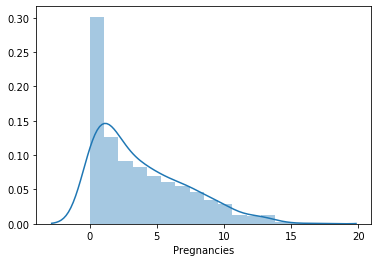

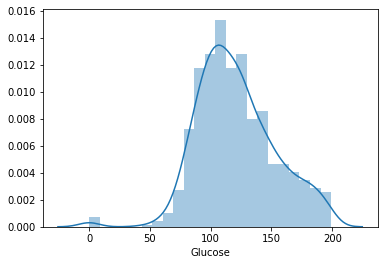

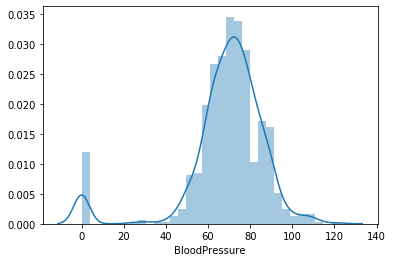

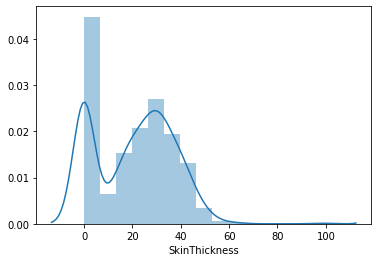

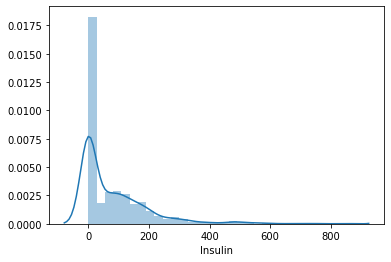

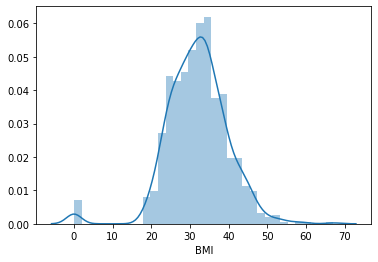

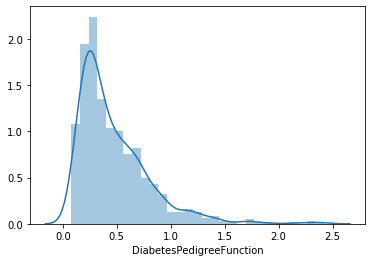

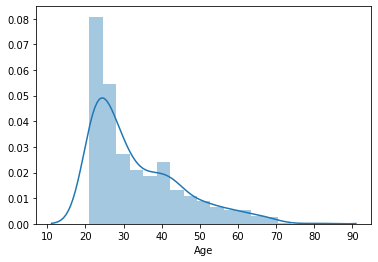

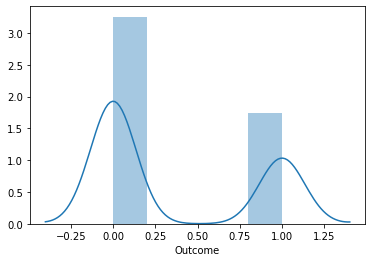

In [7]:
#Visually explore these variables using histograms

for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.distplot(data[col])
#plt.savefig("HISTOGRAM.pdf")    

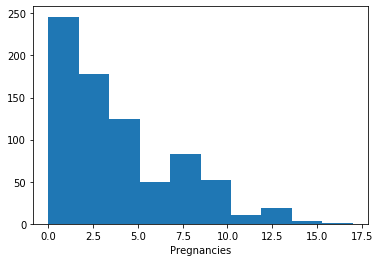

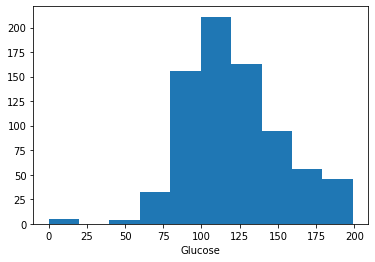

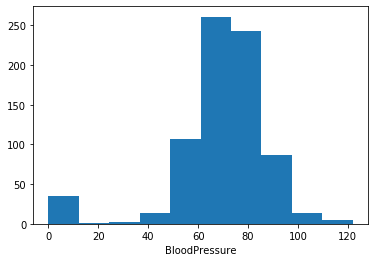

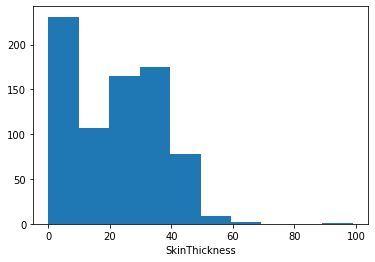

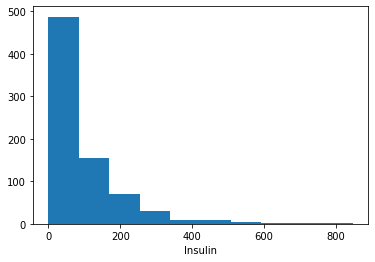

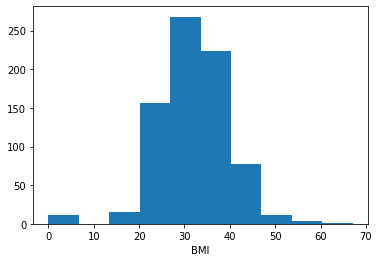

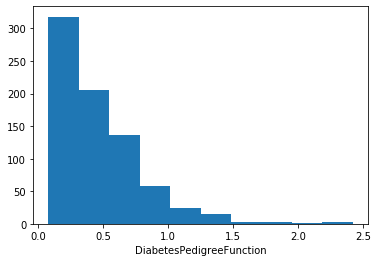

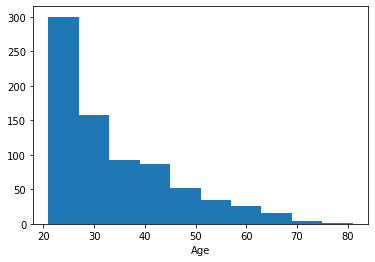

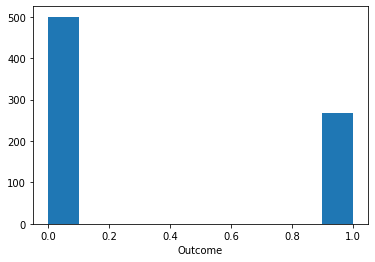

In [8]:
#Visually explore these variables using histograms

for i, col in enumerate(data.columns):
    plt.figure(i)
    plt.hist(data[col])
    plt.xlabel(col,fontsize=10)
#plt.savefig("HISTOGRAM1.pdf")        

In [9]:
(data == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
X=data.drop(['Outcome'] ,axis=1)
y=data['Outcome']

In [11]:
from sklearn.impute  import SimpleImputer

In [12]:
#Treat the missing values accordingly

imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer = imputer.fit(X.values)

imd = imputer.transform(X.values)

imd

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

<Figure size 432x288 with 0 Axes>

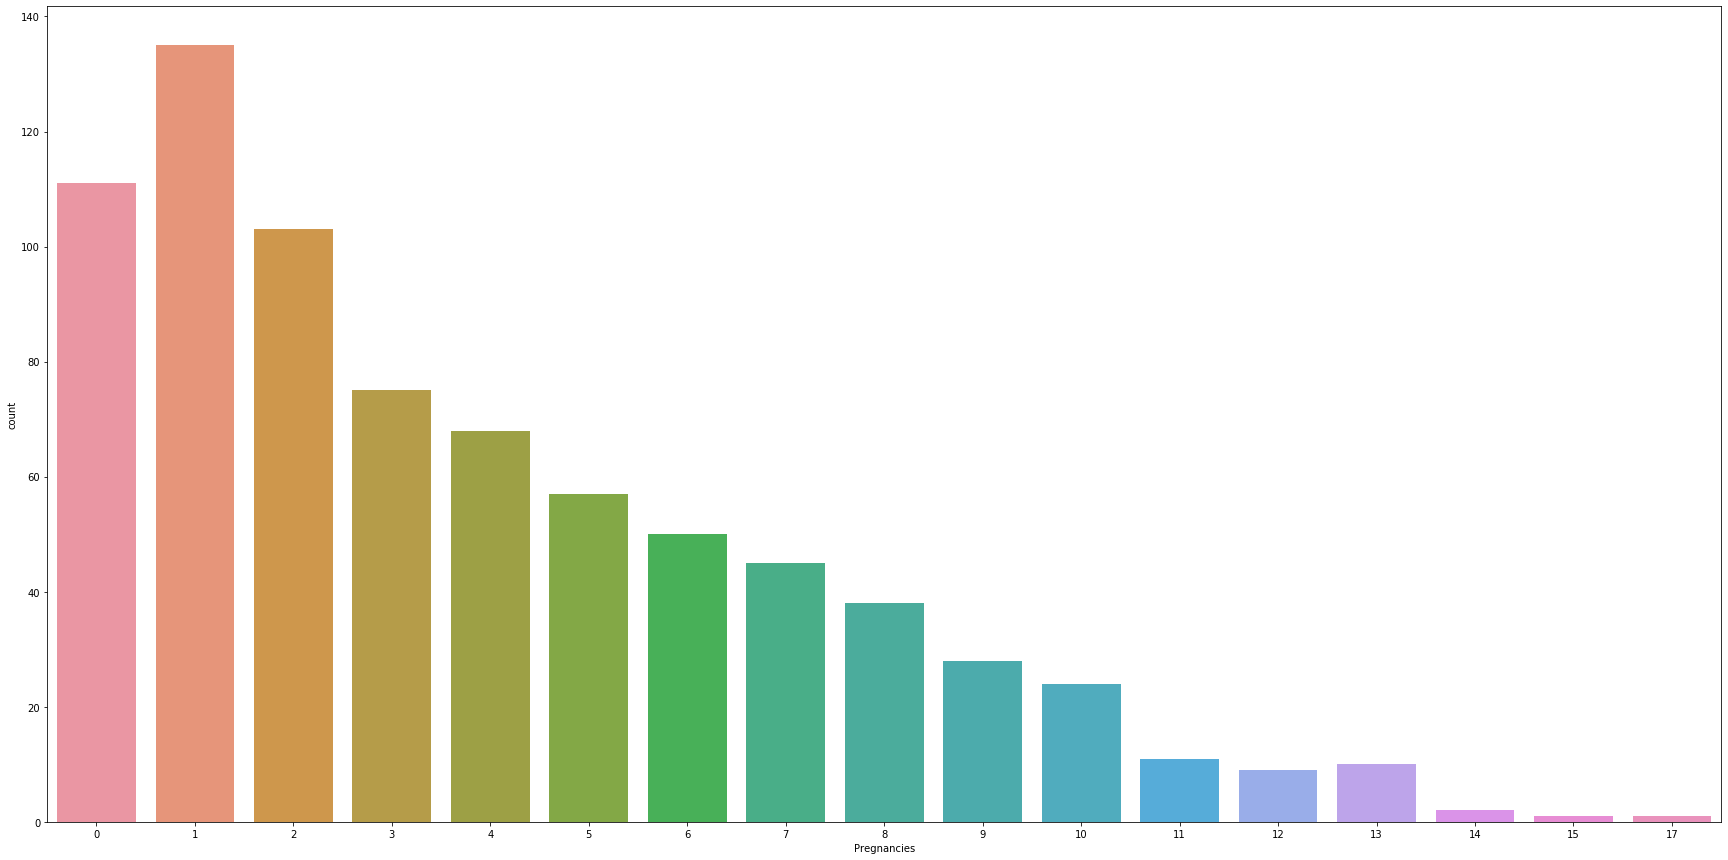

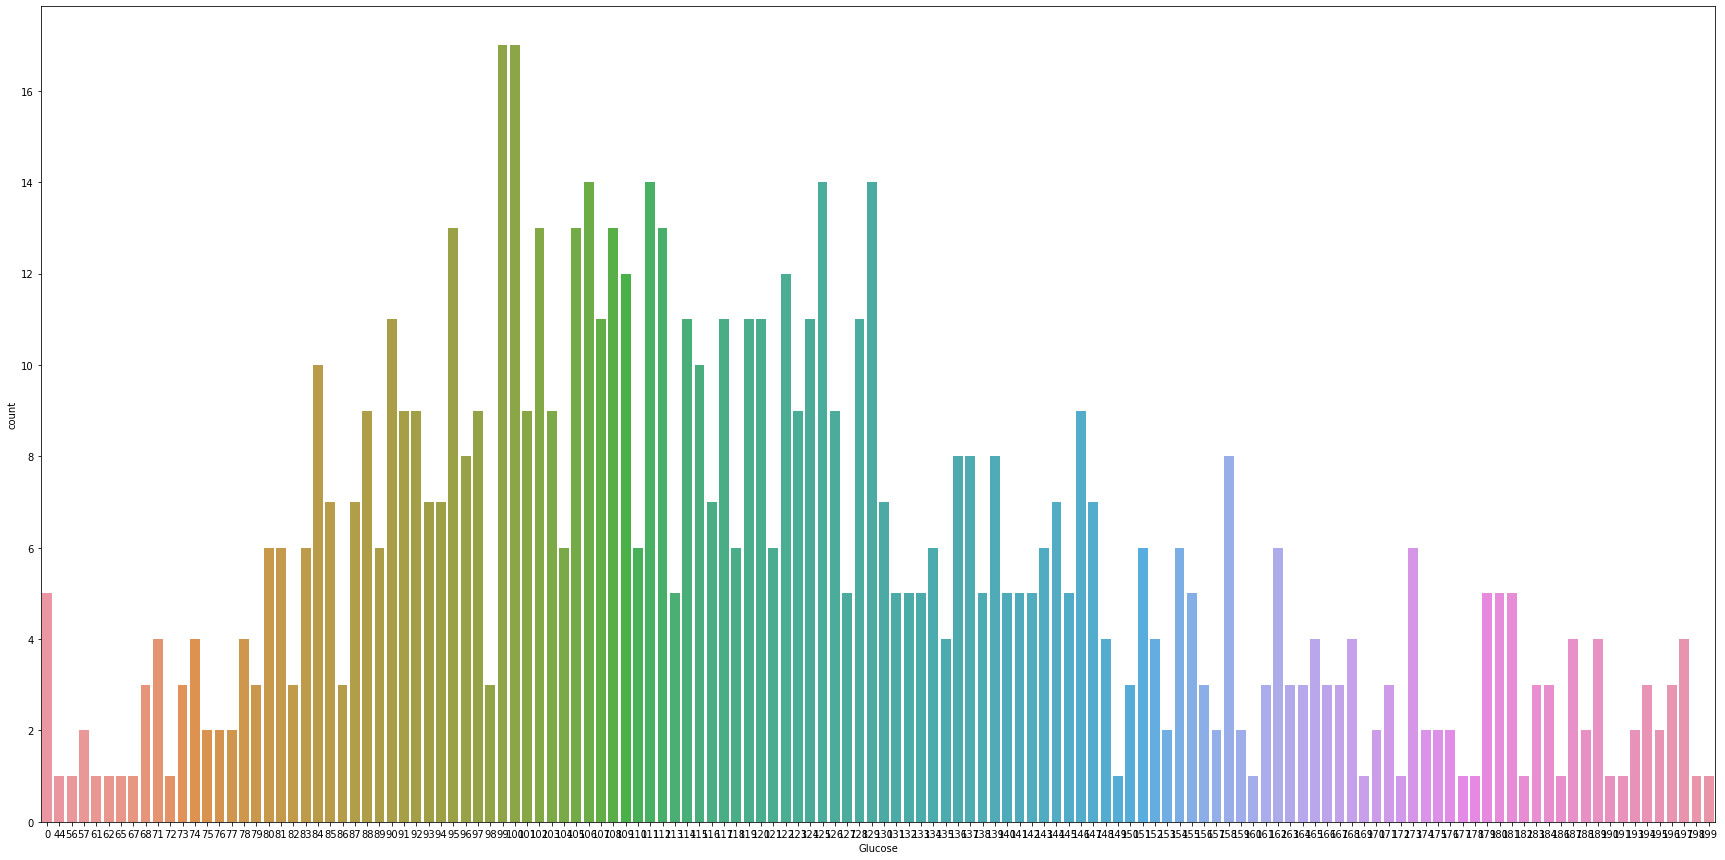

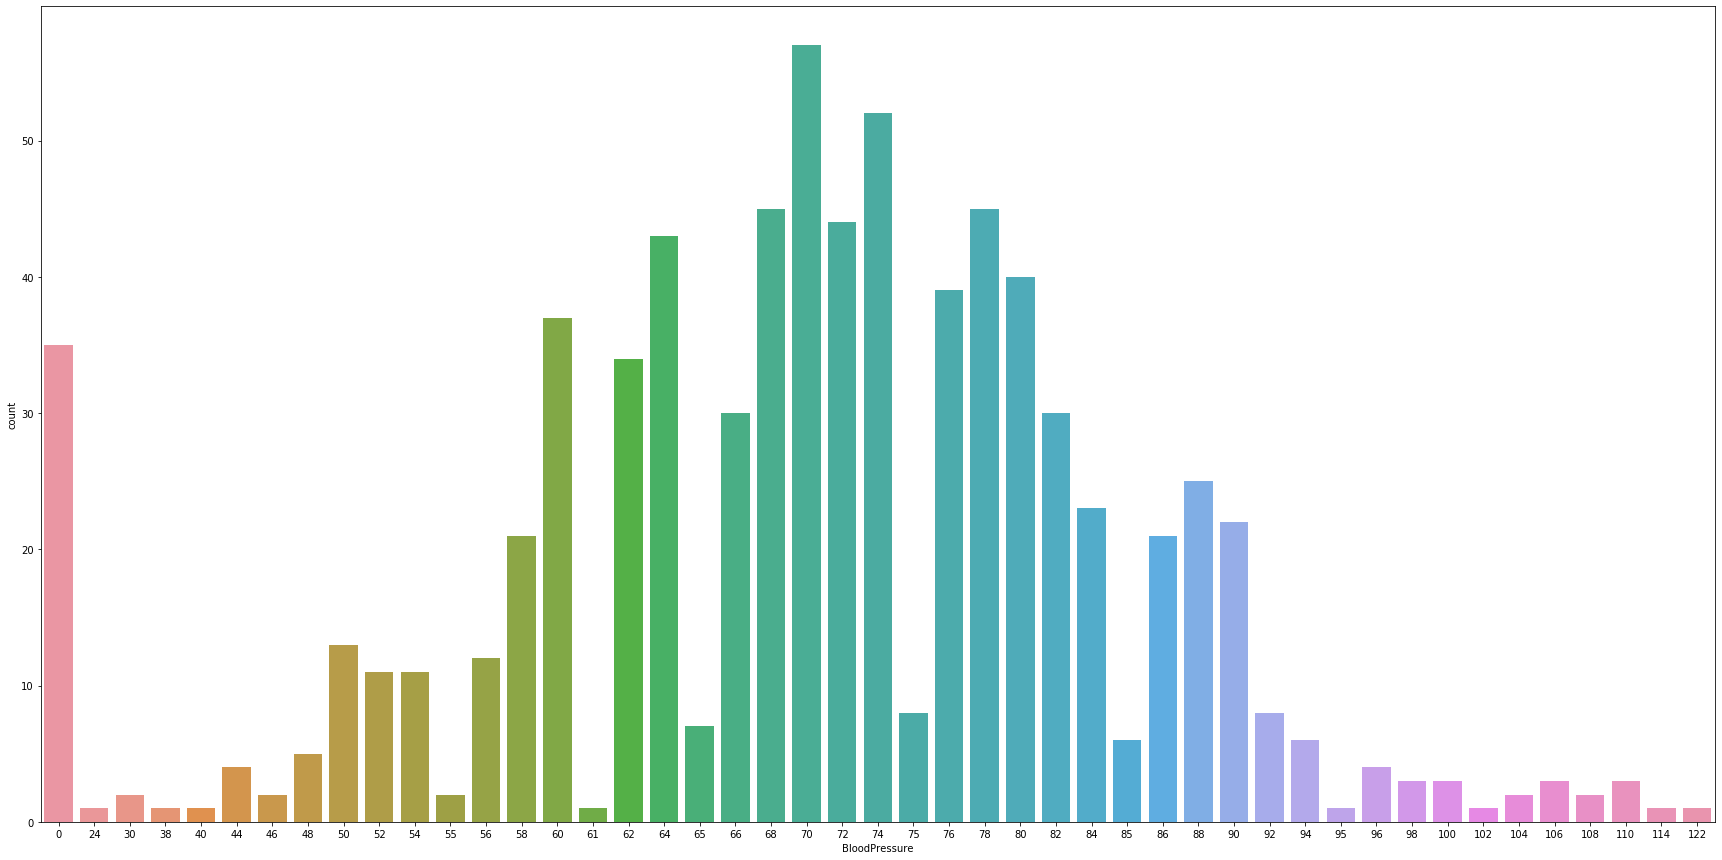

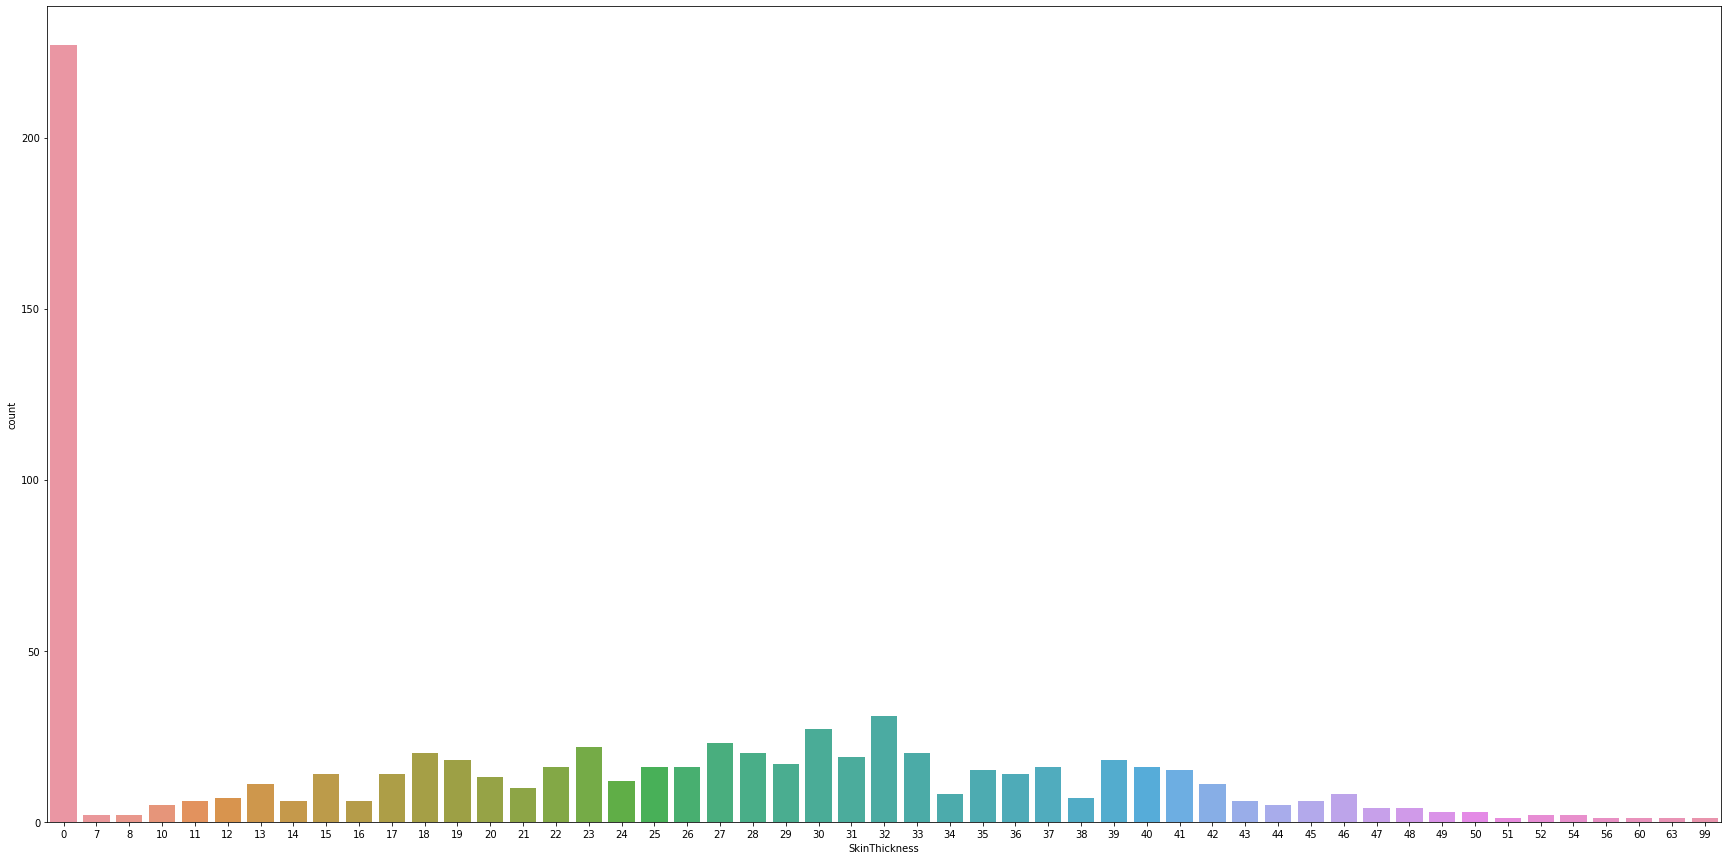

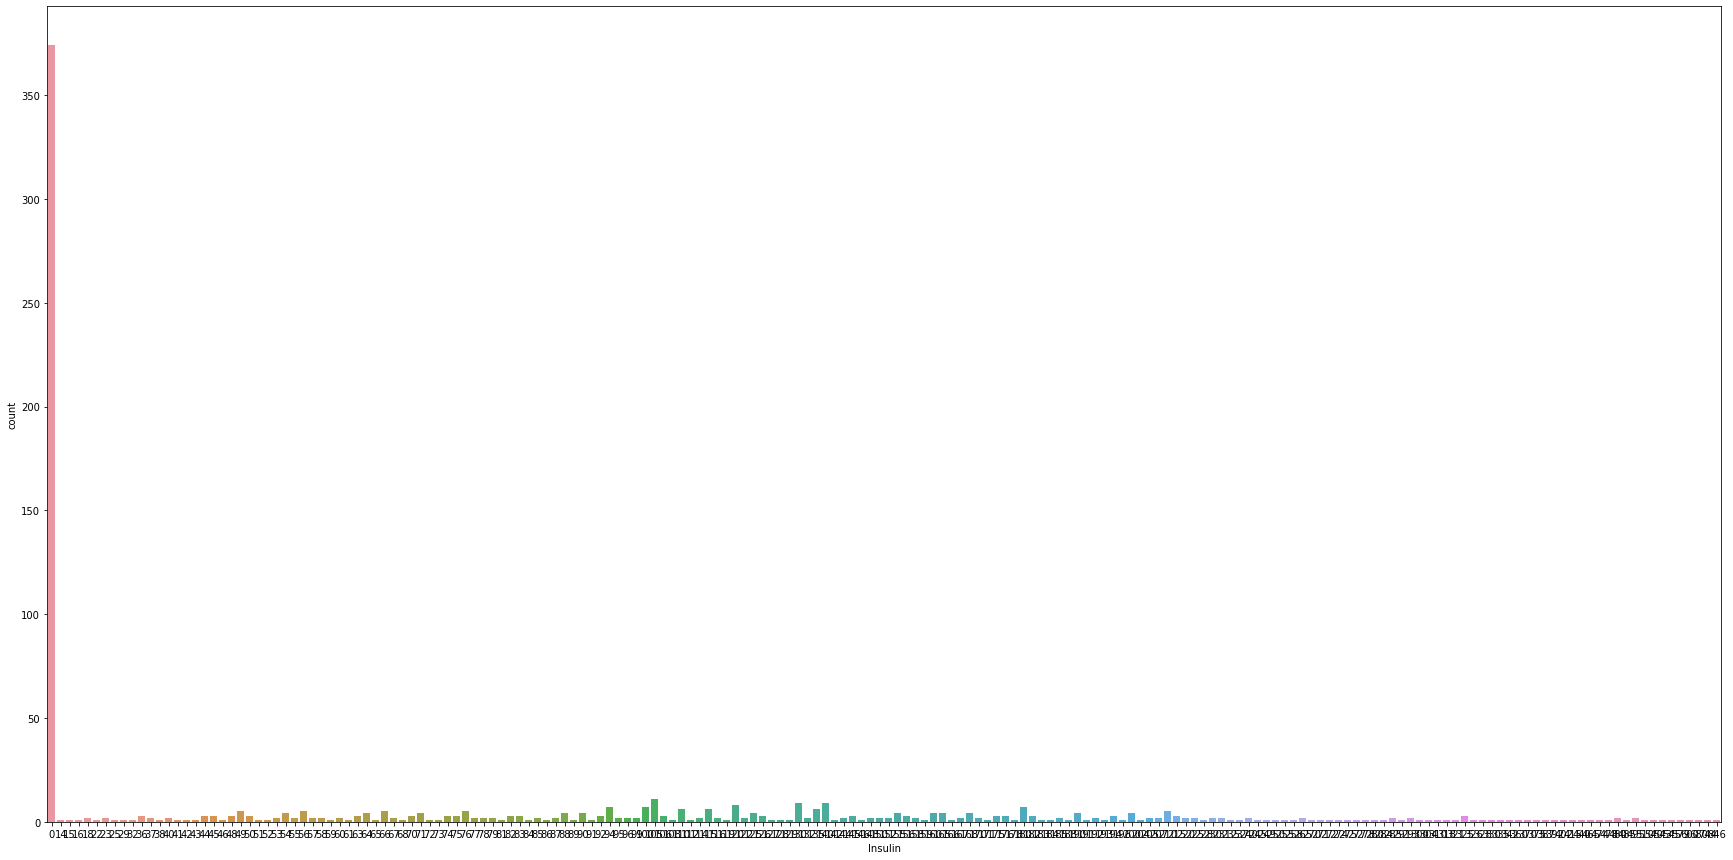

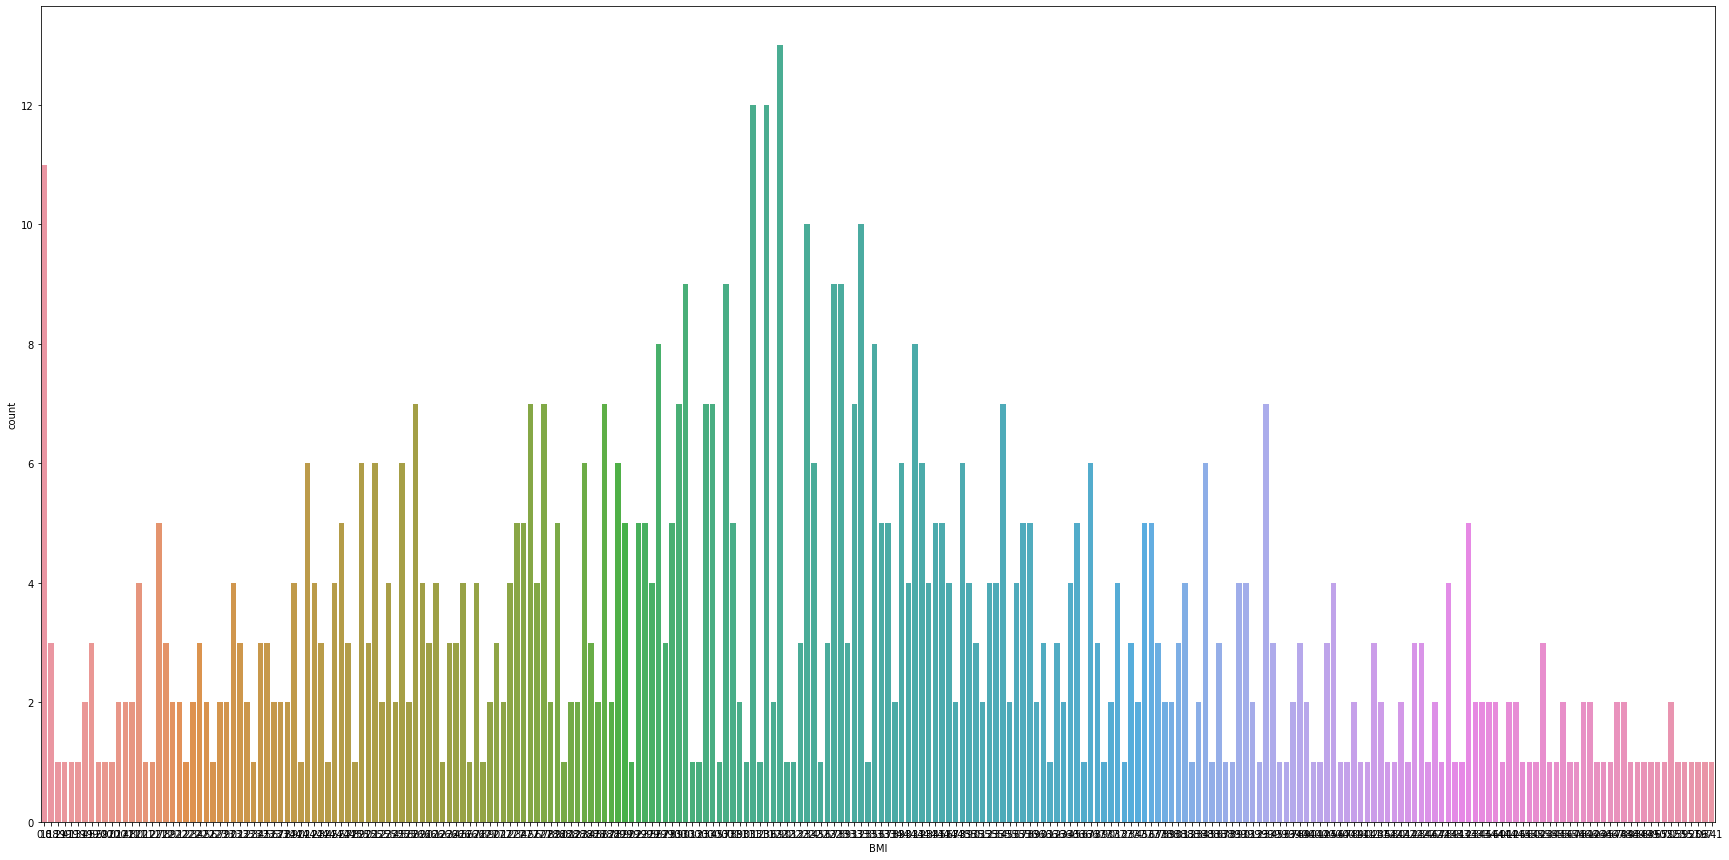

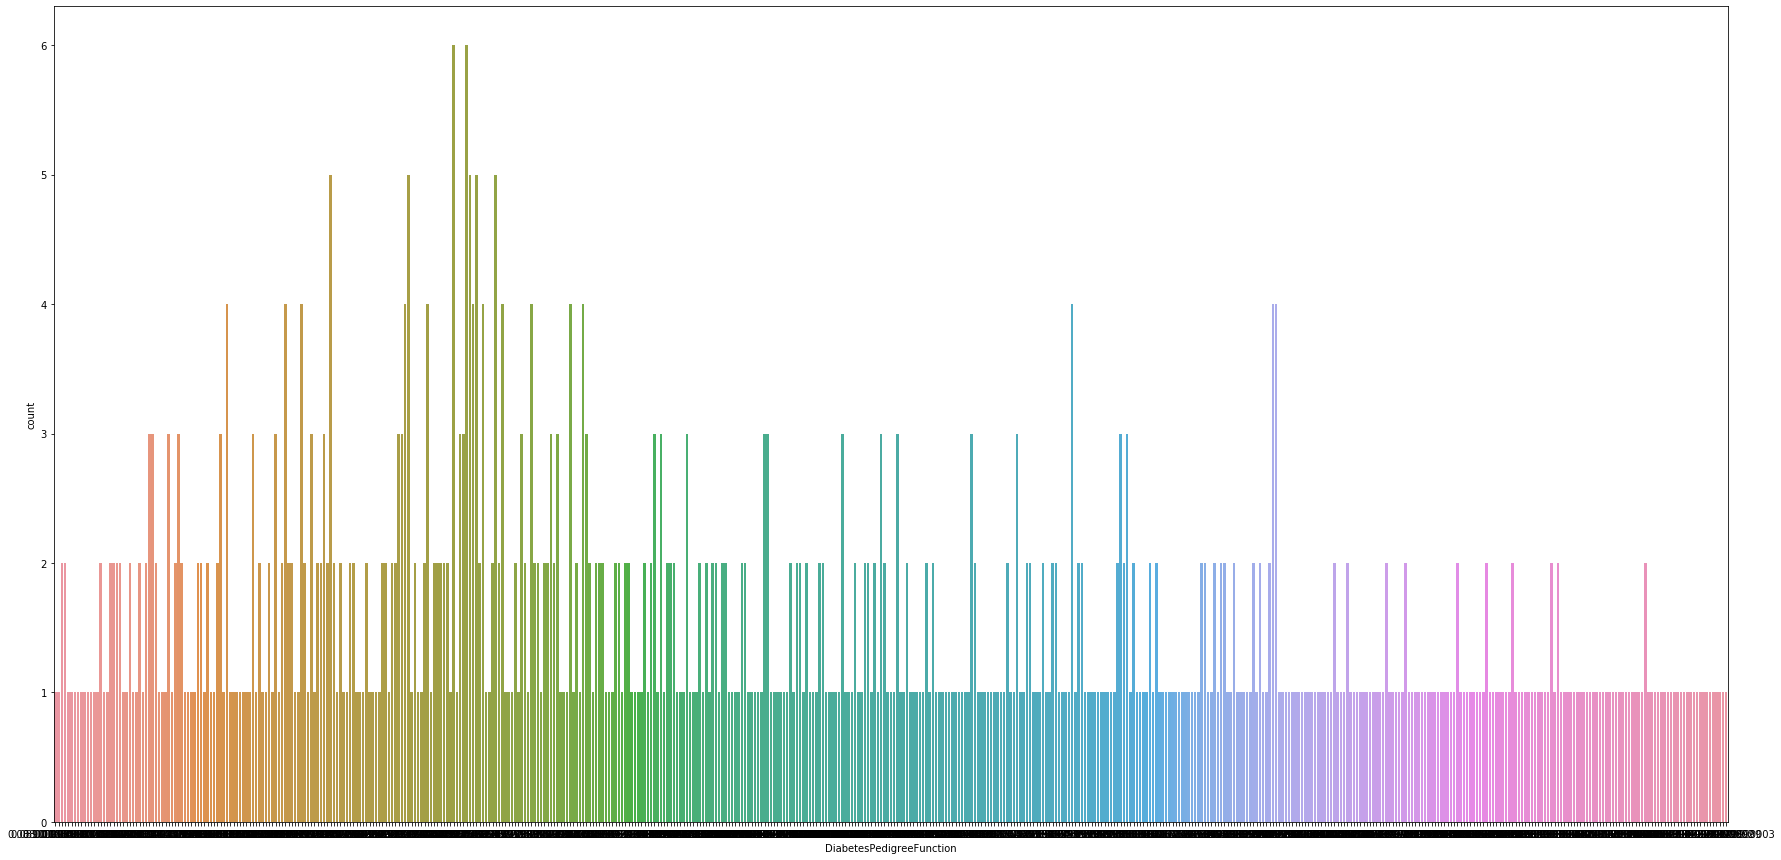

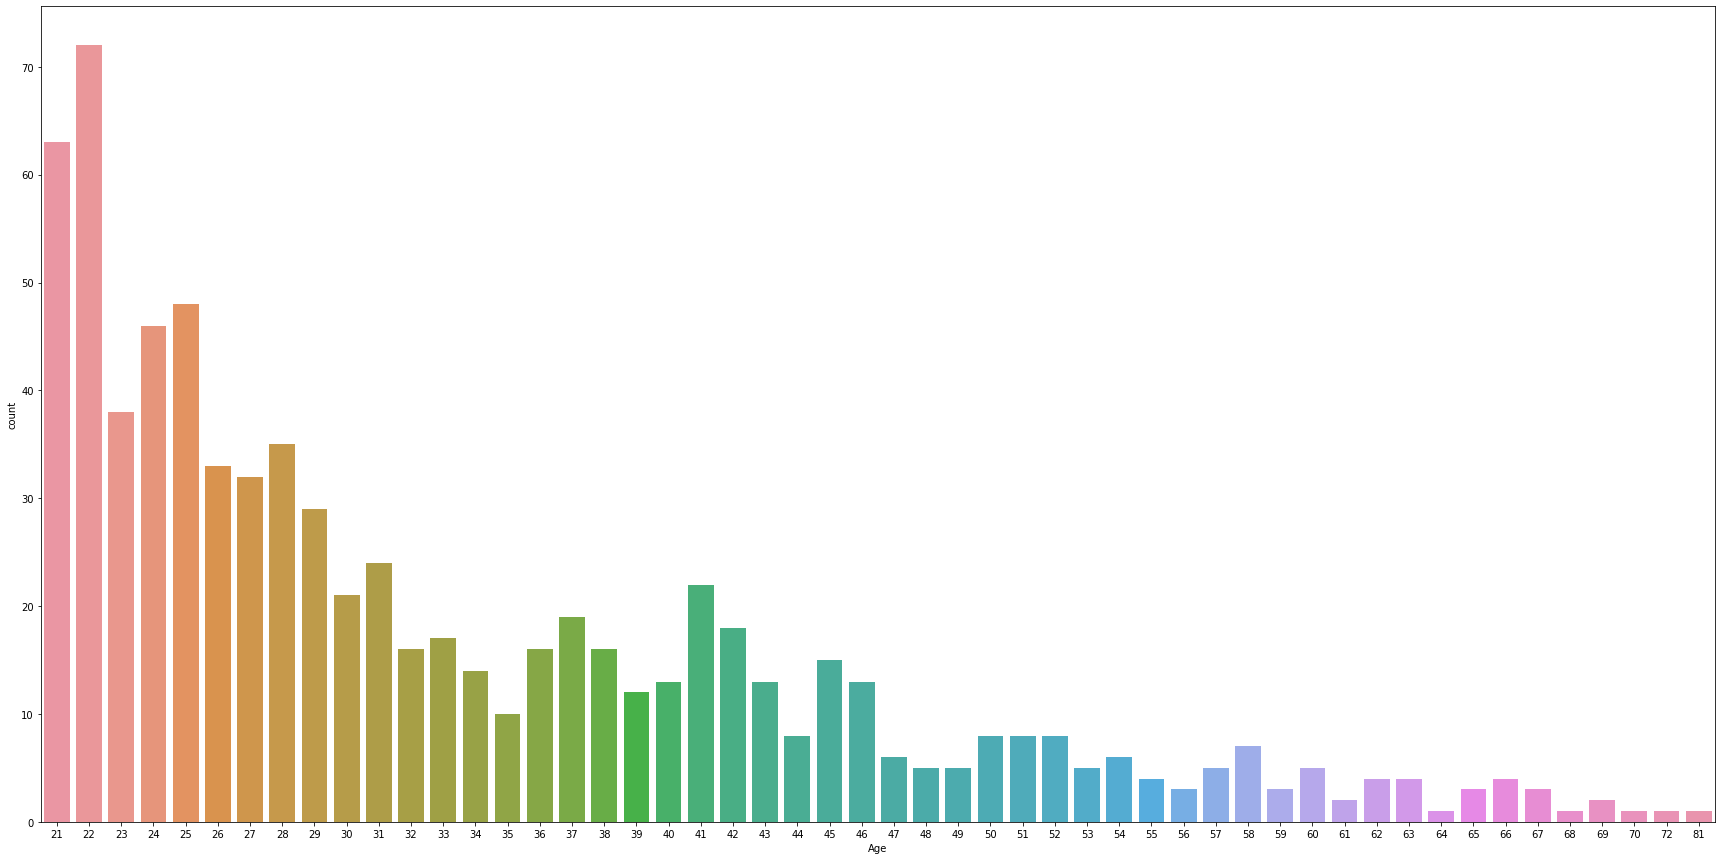

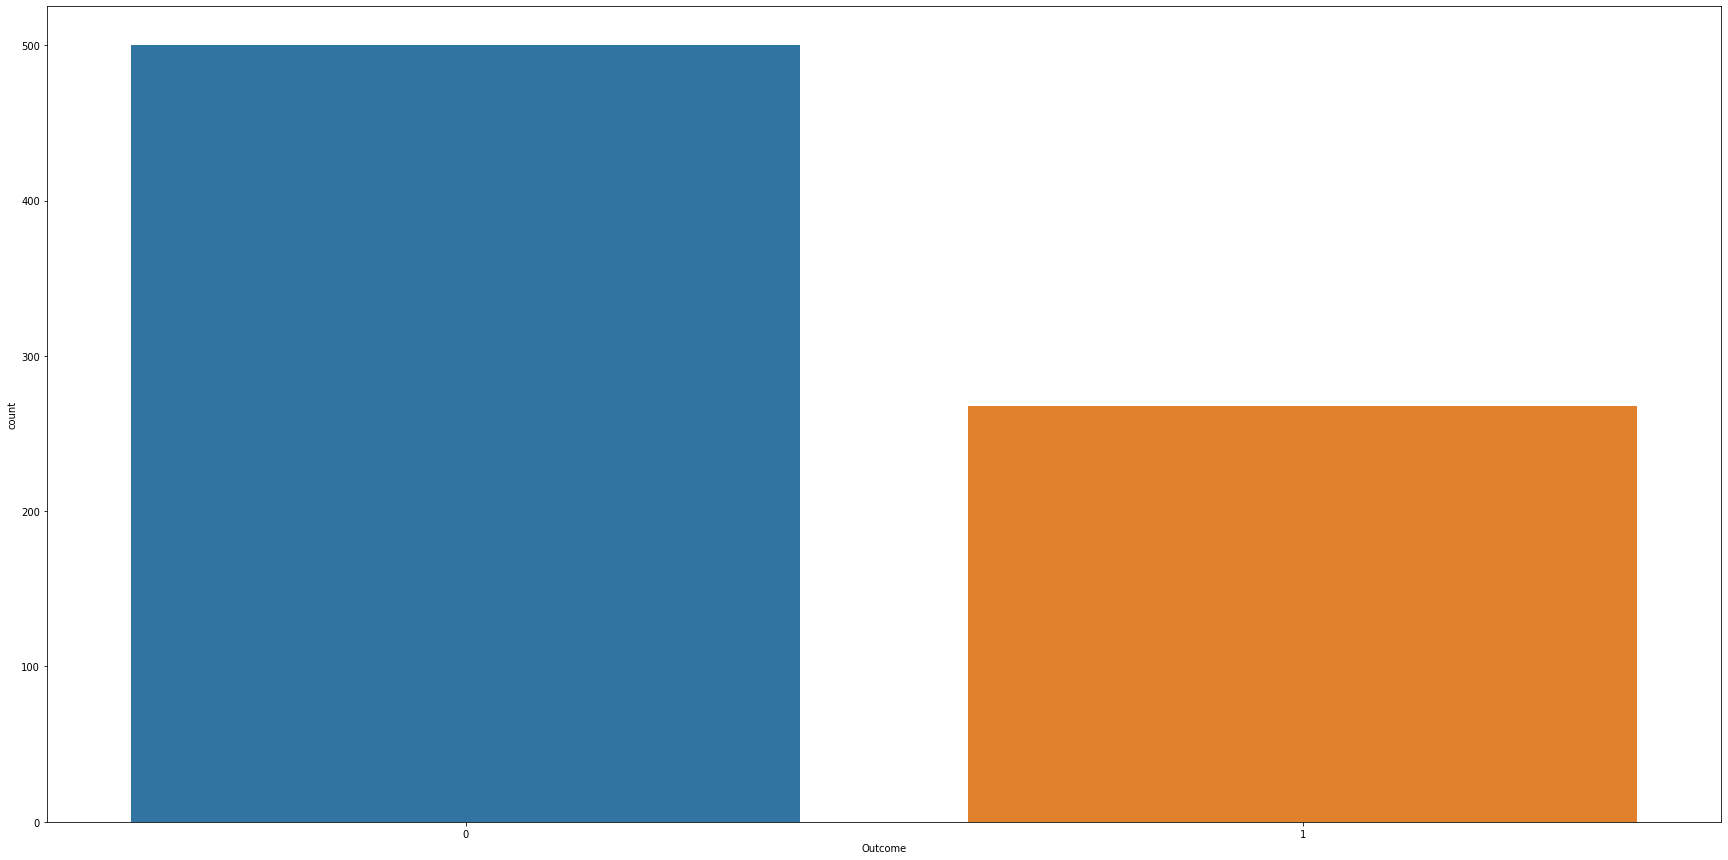

In [13]:
#Create a count (frequency) plot describing the data types and the count of variables. 

for i, col in enumerate(data.columns):
    plt.figure(i)
    plt.figure(figsize=(30,15))
    sns.countplot(data[col])
#plt.savefig("COUNT PLOT.pdf")        

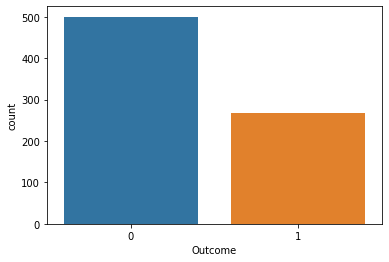

In [14]:
sns.countplot(data['Outcome'])
#plt.savefig("OUTCOME COUNTPLOT.pdf")    

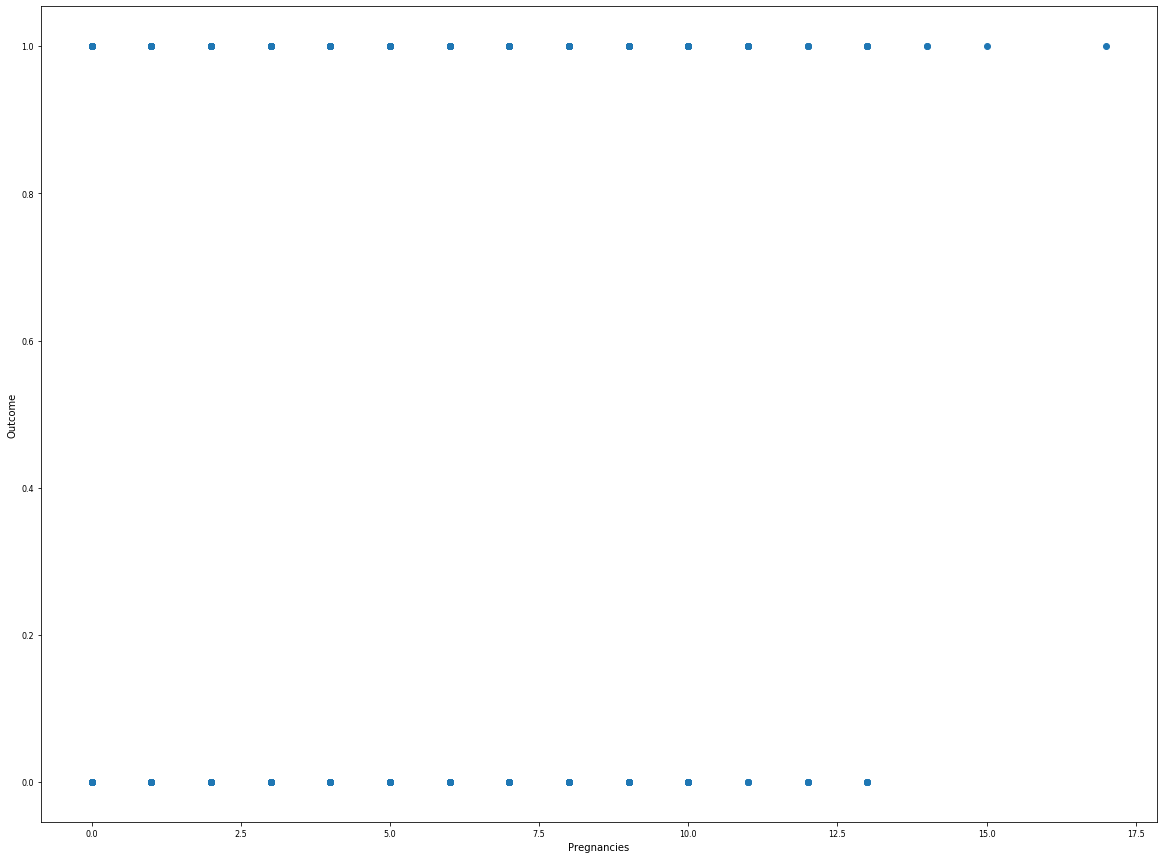

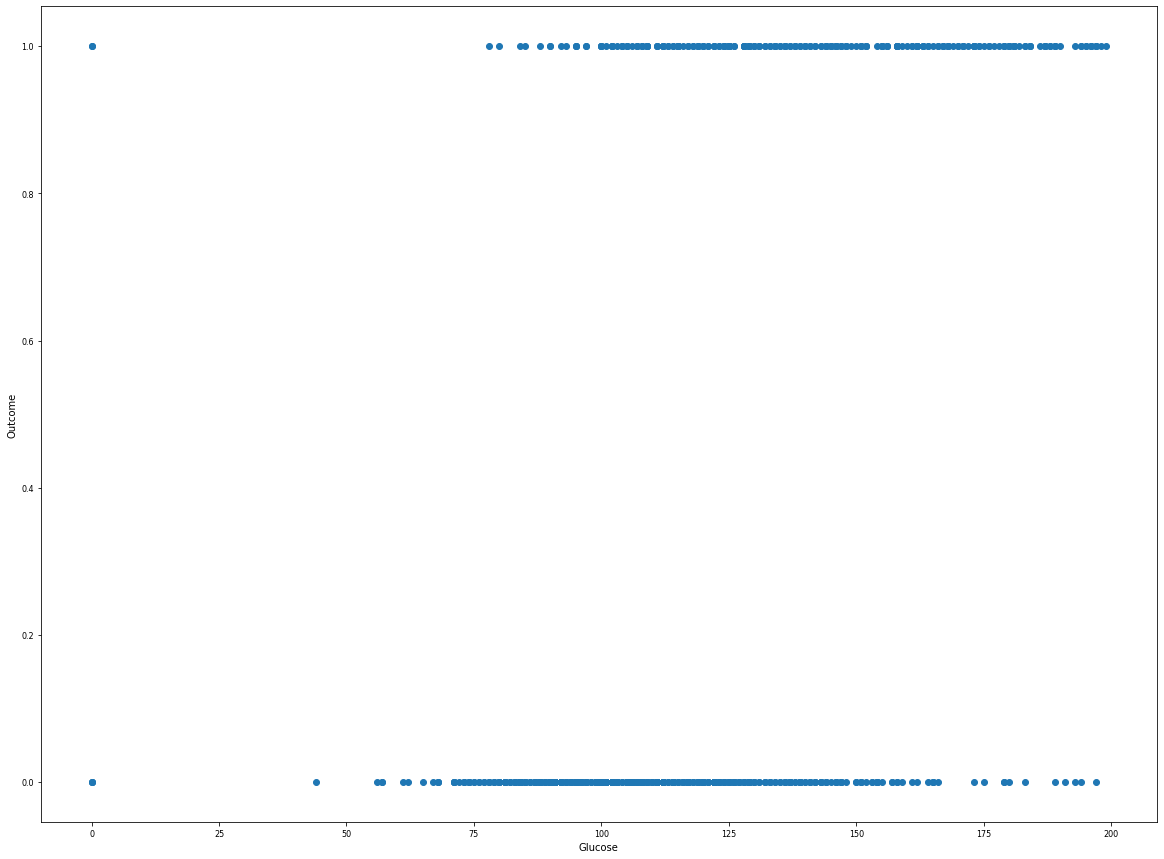

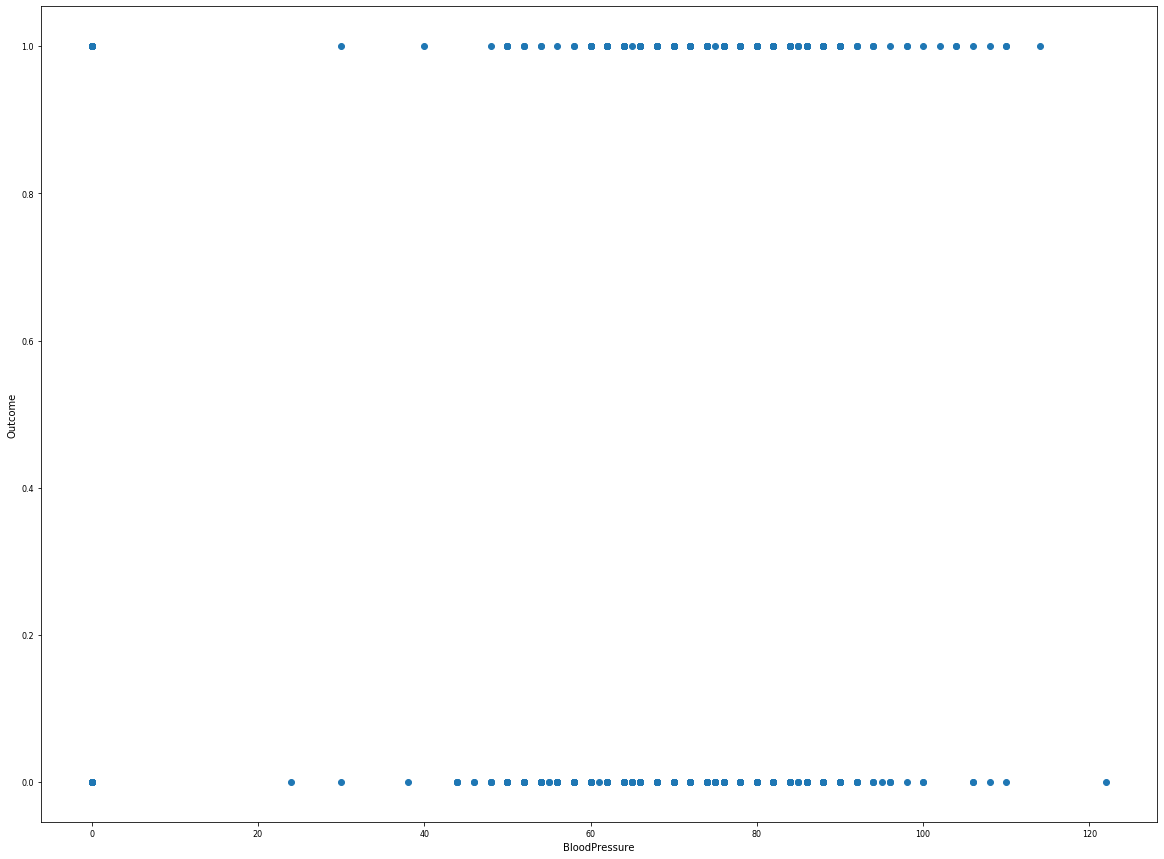

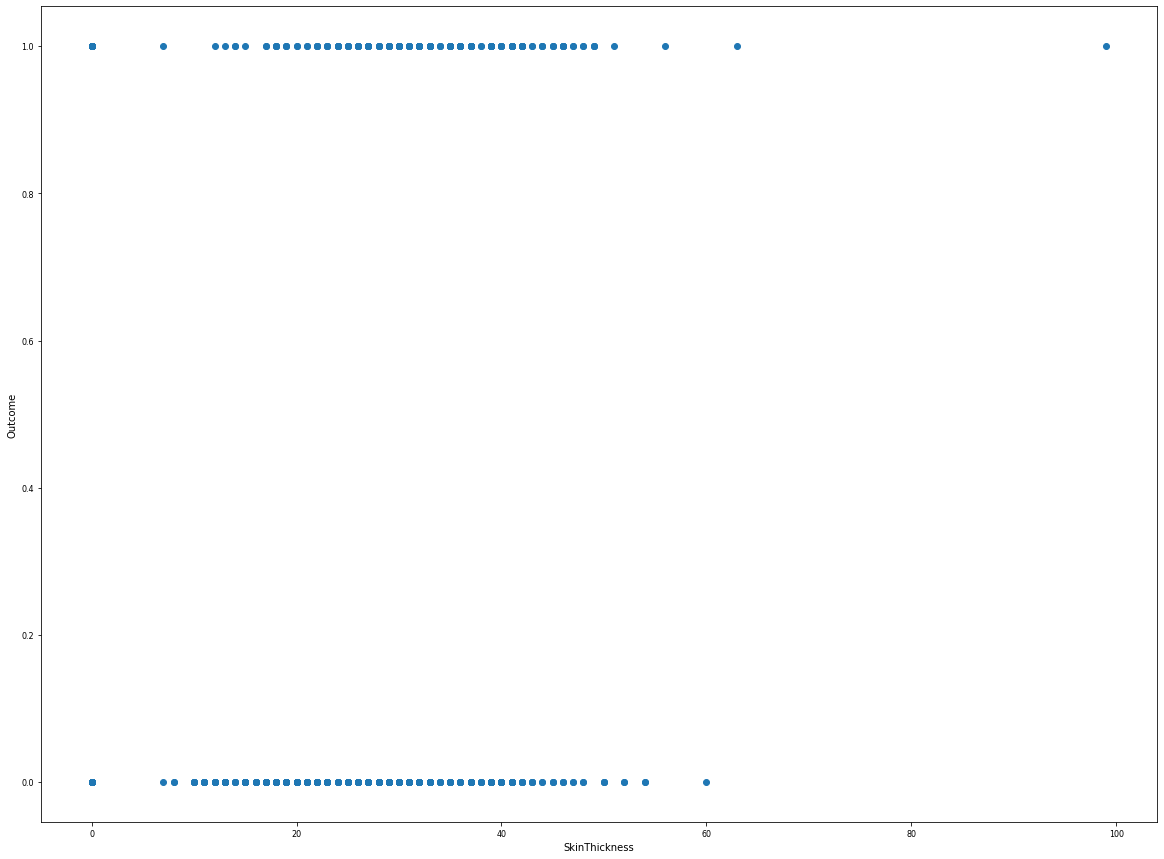

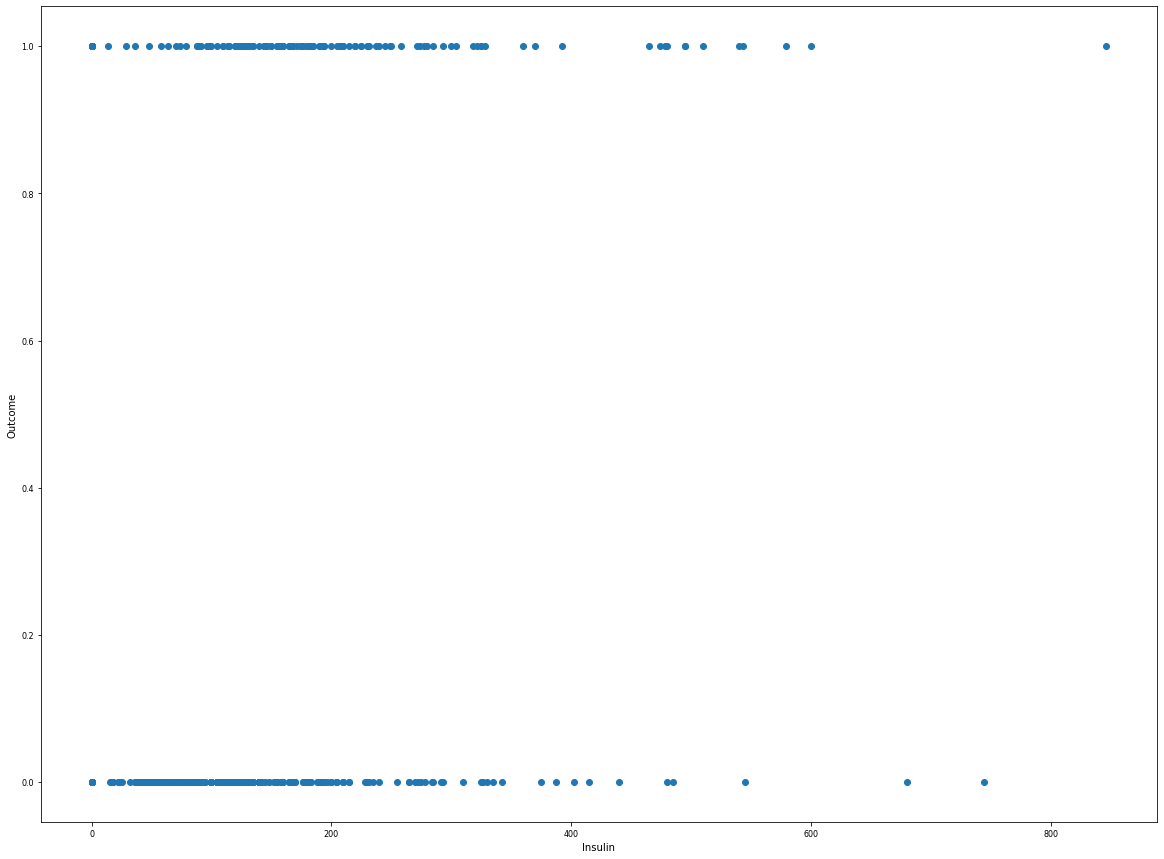

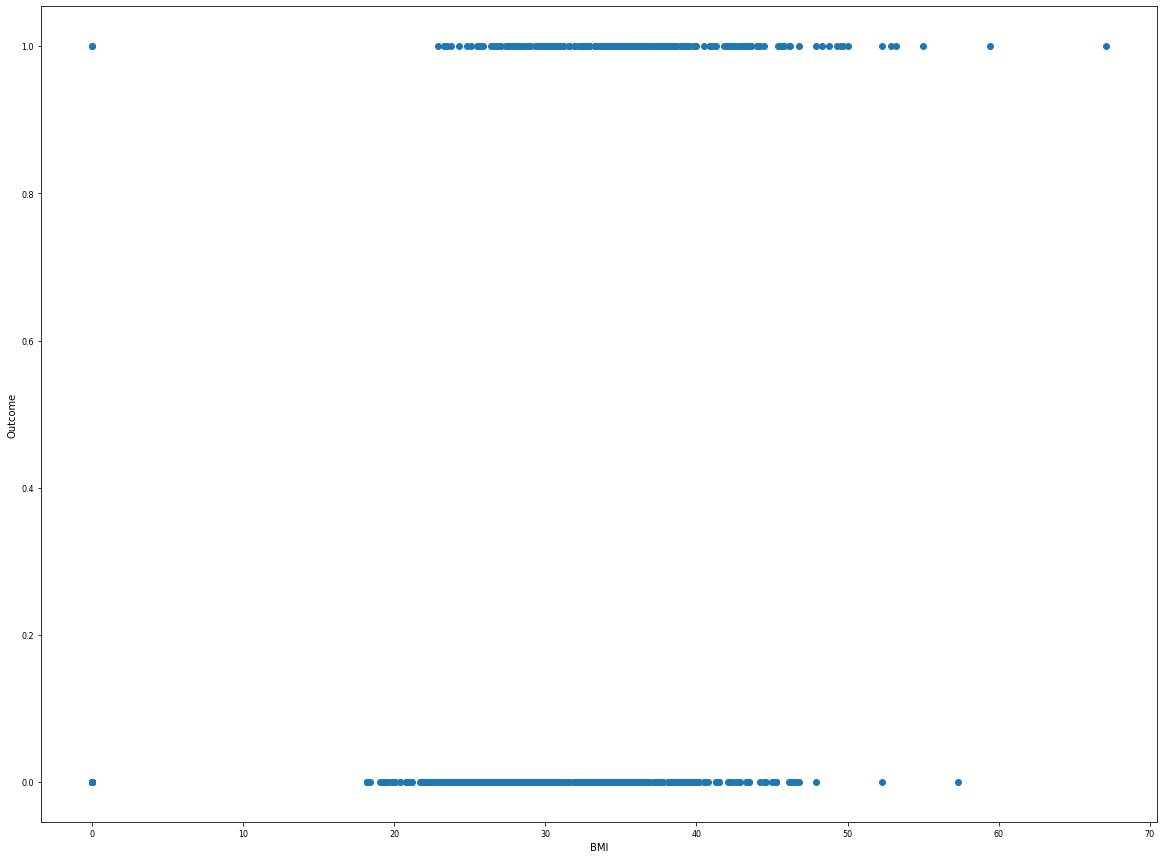

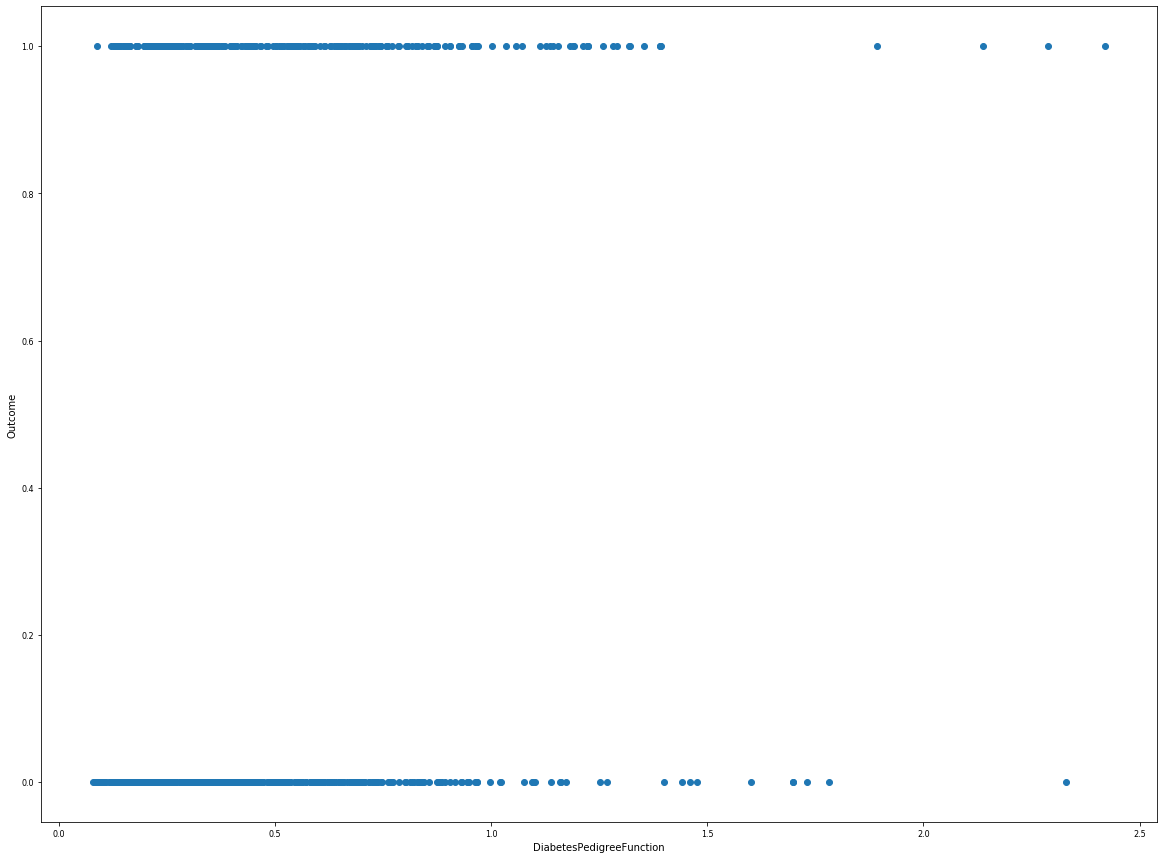

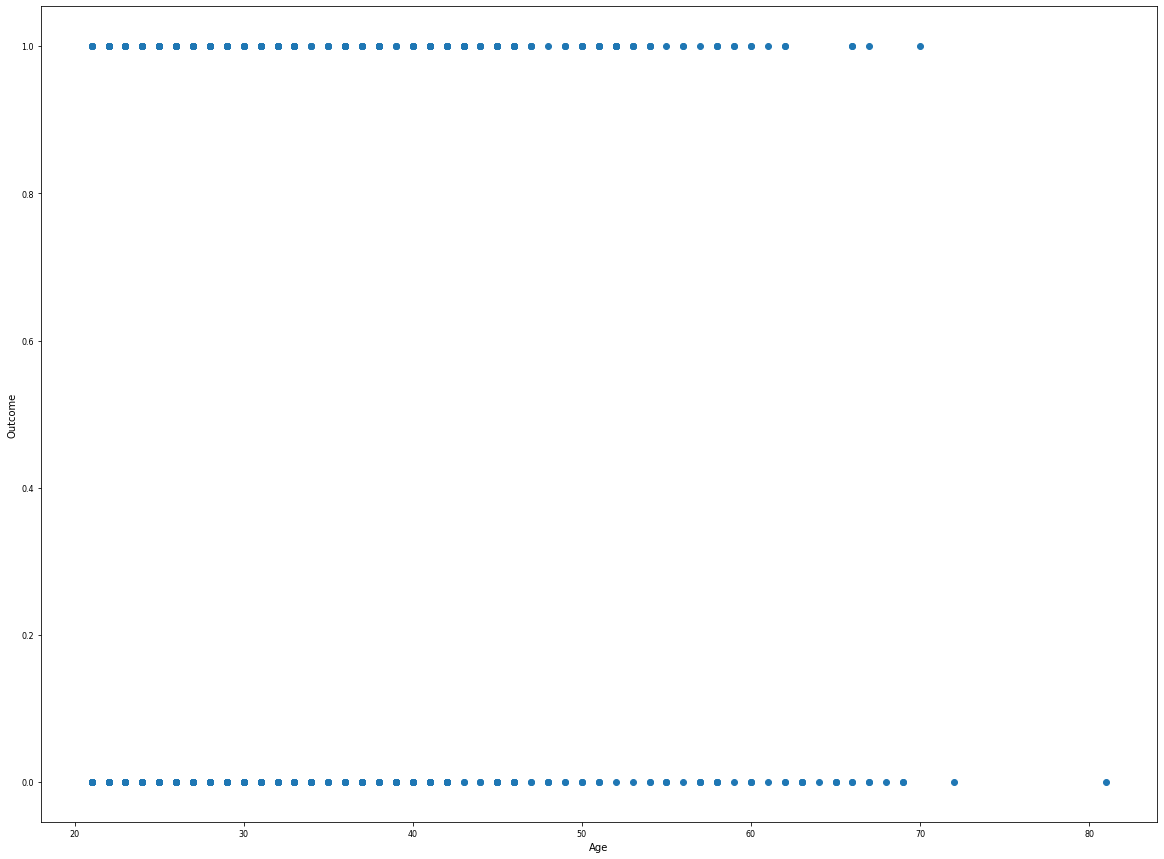

In [15]:
cols=X.columns

for col in cols:
    plt.figure(figsize=(20,15))
    plt.scatter(x=col,y='Outcome',data=data)
    
    plt.xlabel(col,fontsize=10)
    plt.ylabel('Outcome',fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

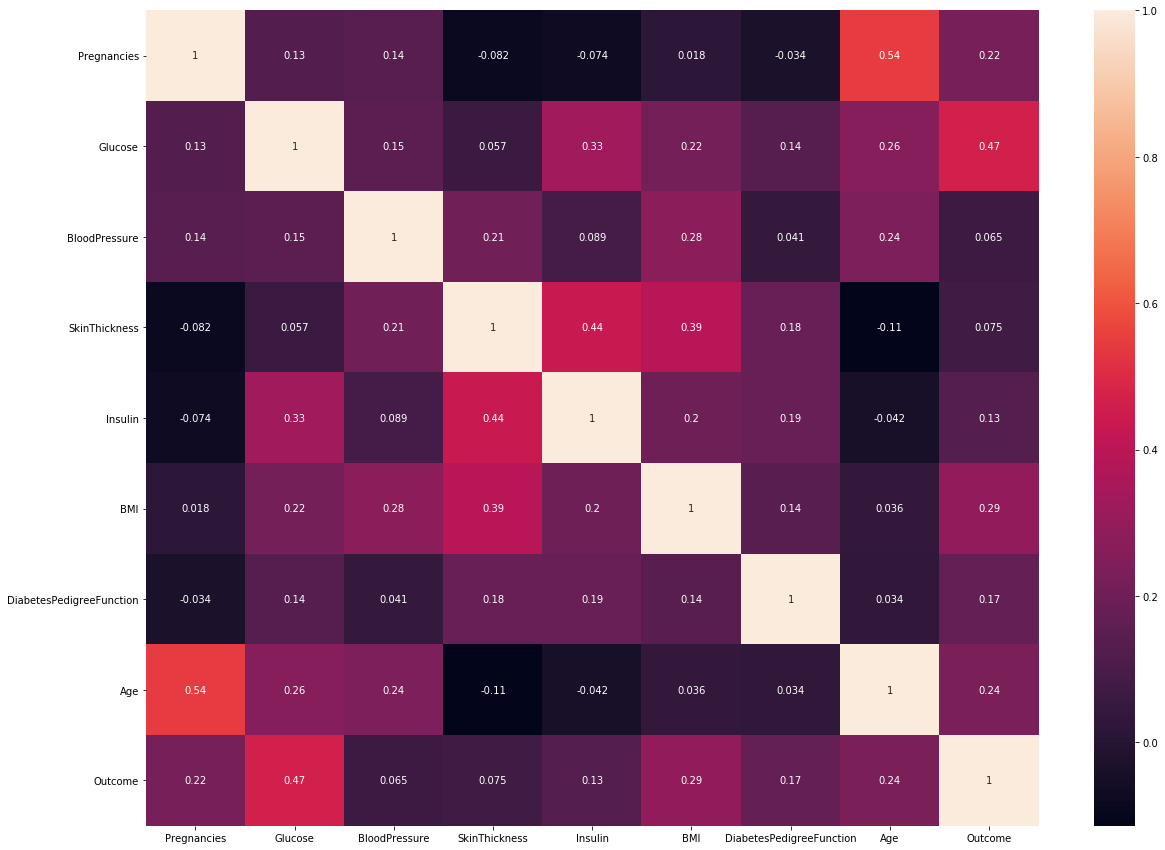

In [16]:
#correlation analysis

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
#plt.savefig("correlation.pdf")    

<Figure size 1440x1080 with 0 Axes>

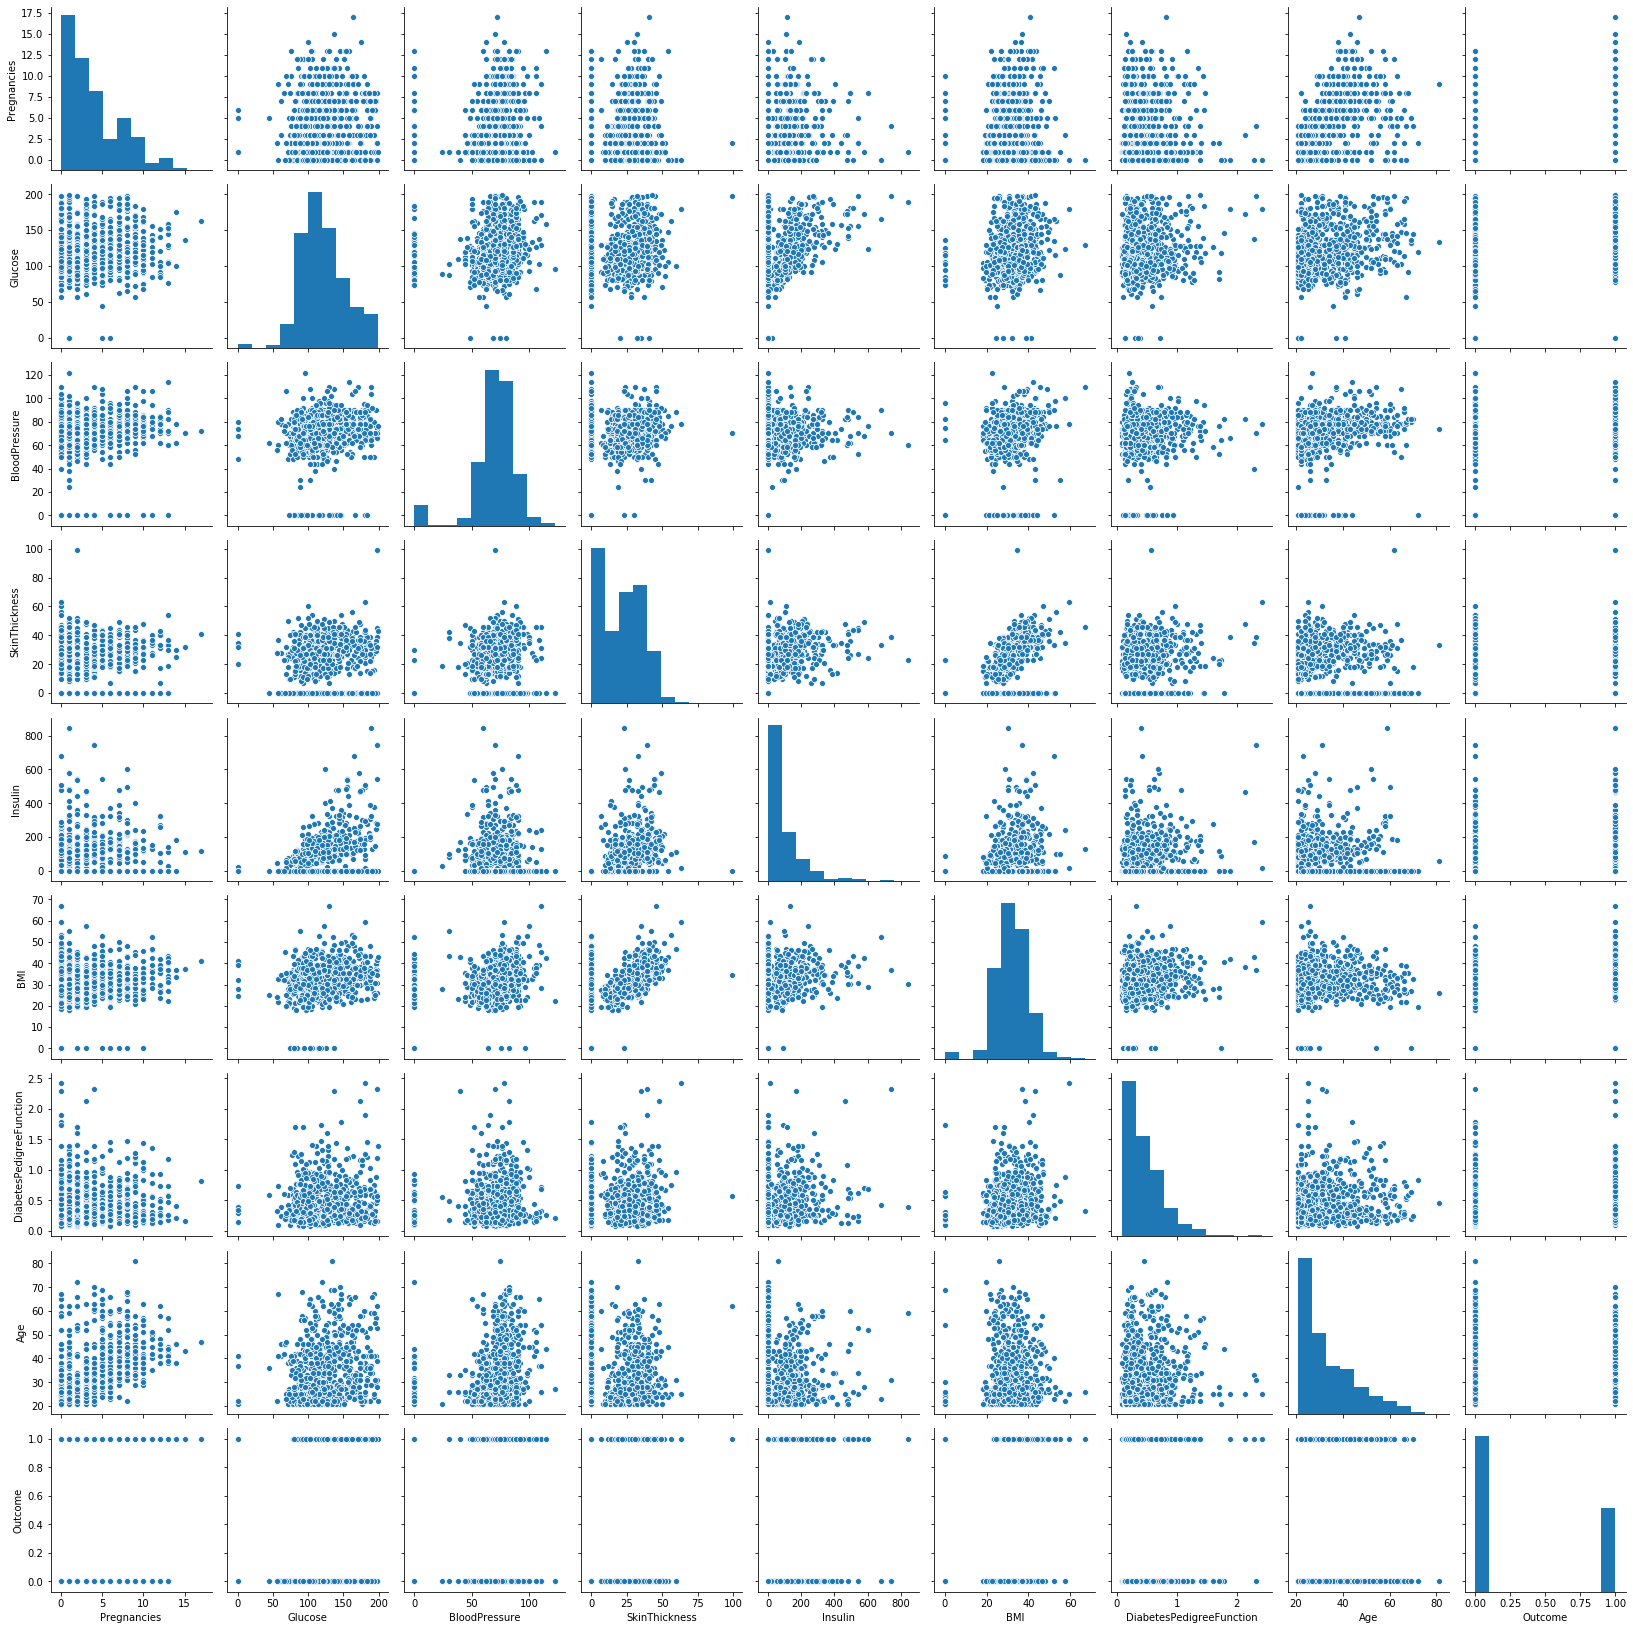

In [17]:
#scatter charts between the pair of variables  

plt.figure(figsize=(20,15))
sns.pairplot(data)
#plt.savefig("scatter plot.pdf")    

In [18]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import KFold

In [20]:
#Compare various models with the results from KNN algorithm.

models = []
models.append(('LR', LogisticRegression()))
models.append(('RDFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGBC', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, imd, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.774727 (0.046894)
RDFC: 0.764217 (0.064292)
KNN: 0.712218 (0.067437)
CART: 0.691319 (0.058357)
NB: 0.751299 (0.040842)
SVM: 0.759176 (0.054632)
XGBC: 0.748735 (0.056580)


In [21]:
from sklearn.metrics import confusion_matrix ,classification_report,accuracy_score,roc_curve, auc

In [22]:
X_train, X_test, y_train, y_test = train_test_split(imd, y, test_size=0.30)

In [23]:
classifier = DecisionTreeClassifier()
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Create a classification report
print('CART',classification_report(y_test, y_pred))

# Create a confusion matrix
print('CART',confusion_matrix(y_test, y_pred))

CART               precision    recall  f1-score   support

           0       0.81      0.79      0.80       156
           1       0.58      0.60      0.59        75

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

CART [[124  32]
 [ 30  45]]


In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6974358974358975

In [25]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[124  32]
 [ 30  45]]


In [26]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.6


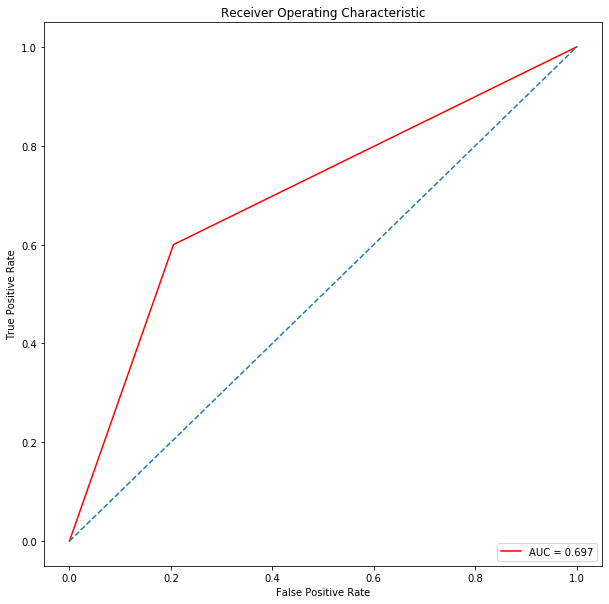

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("AUC plot.pdf")    

In [28]:
for name, model in models:
    y_pred = model.fit(X_train, y_train).predict(X_test)
    print(name,classification_report(y_test, y_pred))
    print(name,confusion_matrix(y_test, y_pred))
    False_positive_rate, True_positive_rate, Thresholds = roc_curve(y_test, y_pred)
    Roc_auc = auc(False_positive_rate, True_positive_rate)
    msg = "%s: %f " % (name+ "_ROC_AUC", Roc_auc)
    print(msg)

LR               precision    recall  f1-score   support

           0       0.79      0.88      0.84       156
           1       0.68      0.52      0.59        75

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.76       231

LR [[138  18]
 [ 36  39]]
LR_ROC_AUC: 0.702308 
RDFC               precision    recall  f1-score   support

           0       0.80      0.85      0.83       156
           1       0.65      0.56      0.60        75

    accuracy                           0.76       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.75      0.76      0.75       231

RDFC [[133  23]
 [ 33  42]]
RDFC_ROC_AUC: 0.706282 
KNN               precision    recall  f1-score   support

           0       0.79      0.78      0.78       156
           1       0.55      0.56      0.55        75

    accuracy                           0.71       231
   macro avg    